<a href="https://colab.research.google.com/github/RizalRio/py-occupancy-fuzzy/blob/main/OccupancyUASBatch_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ==========================================
# FUZZY LOGIC FINAL: 4 INPUT (FULL SYSTEM)
# ==========================================

!pip install -U scikit-fuzzy

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
%matplotlib inline

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 36.7 MB/s eta 0:00:00


✅ System Loaded: Advanced Rules Logic Ready...

🏢 Analisis Detail (10 Rules):
   - Cahaya    : 426 Lux
   - CO2       : 721 ppm
   - Suhu      : 23.18 C
   - Humidity  : 27 %

🚀 Skor Akhir: 57.38 / 100


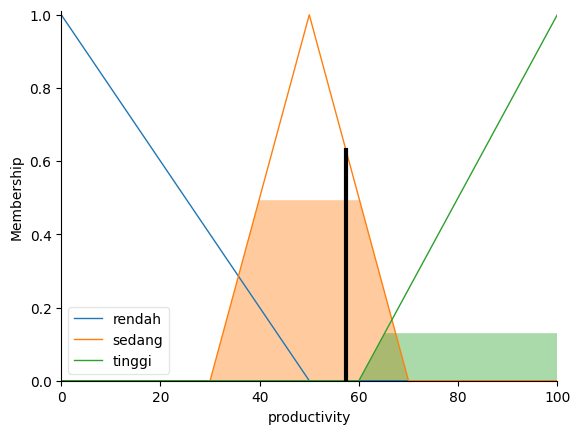

KESIMPULAN: Ruangan Standar (Medium Productivity). Cukup oke buat kerja rutin. ✅


In [ ]:
print("✅ System Loaded: Advanced Rules Logic Ready...")

# ==========================================
# 1. VARIABEL INPUT (Versi Tuned/Relaxed)
# ==========================================
light = ctrl.Antecedent(np.arange(0, 1001, 1), 'light')
co2   = ctrl.Antecedent(np.arange(0, 2001, 1), 'co2')
temp  = ctrl.Antecedent(np.arange(15, 36, 1), 'temp')
humid = ctrl.Antecedent(np.arange(0, 101, 1), 'humid')
productivity = ctrl.Consequent(np.arange(0, 101, 1), 'productivity')

# --- MEMBERSHIP FUNCTIONS (Versi Pemaaf) ---

# CAHAYA
light['kurang'] = fuzz.trimf(light.universe, [0, 0, 300])
light['cukup']  = fuzz.trimf(light.universe, [200, 350, 500])
light['ideal']  = fuzz.trapmf(light.universe, [400, 600, 1000, 1000])

# CO2
co2['segar']  = fuzz.trimf(co2.universe, [0, 0, 600])
co2['biasa']  = fuzz.trimf(co2.universe, [500, 800, 1100])
co2['pengap'] = fuzz.trapmf(co2.universe, [900, 1200, 2000, 2000])

# SUHU
temp['dingin'] = fuzz.trimf(temp.universe, [15, 15, 21])
temp['nyaman'] = fuzz.trimf(temp.universe, [20, 24, 28])
temp['panas']  = fuzz.trapmf(temp.universe, [26, 30, 35, 35])

# HUMIDITY
humid['kering'] = fuzz.trimf(humid.universe, [0, 0, 25])
humid['ideal']  = fuzz.trimf(humid.universe, [20, 50, 75])
humid['lembab'] = fuzz.trapmf(humid.universe, [70, 85, 100, 100])

# OUTPUT (PRODUKTIVITAS)
productivity['rendah'] = fuzz.trimf(productivity.universe, [0, 0, 50])
productivity['sedang'] = fuzz.trimf(productivity.universe, [30, 50, 70])
productivity['tinggi'] = fuzz.trimf(productivity.universe, [60, 100, 100])


# ==========================================
# 2. ADVANCED RULE BASE (10 RULES) 🧠
# ==========================================

# --- KELOMPOK 1: DEAL BREAKERS (Kondisi Parah -> Rendah) ---
# R1: Panas banget = Bubar
rule1 = ctrl.Rule(temp['panas'], productivity['rendah'])
# R2: Pengap banget (CO2 tinggi) = Ngantuk/Pusing
rule2 = ctrl.Rule(co2['pengap'], productivity['rendah'])
# R3: Gelap = Gak kelihatan kerjaan
rule3 = ctrl.Rule(light['kurang'], productivity['rendah'])
# R4: Gak nyaman secara fisik (Terlalu Kering ATAU Terlalu Lembab)
rule4 = ctrl.Rule(humid['kering'] | humid['lembab'], productivity['rendah'])

# --- KELOMPOK 2: KOMPROMI / SITUASI UMUM (Campuran -> Sedang) ---
# R5: Suhu nyaman TAPI Cahaya cuma 'Cukup' (Bukan ideal) -> Sedang
rule5 = ctrl.Rule(temp['nyaman'] & light['cukup'], productivity['sedang'])
# R6: Cahaya Ideal TAPI Udara biasa aja (Agak rame) -> Sedang
rule6 = ctrl.Rule(light['ideal'] & co2['biasa'], productivity['sedang'])
# R7: Suhu agak dingin (AC kenceng) TAPI Udara Segar -> Sedang (Masih oke buat mikir)
rule7 = ctrl.Rule(temp['dingin'] & co2['segar'], productivity['sedang'])

# --- KELOMPOK 3: GOLD STANDARD (Sempurna -> Tinggi) ---
# R8: The Perfect Flow (Cahaya Ideal + Suhu Nyaman)
rule8 = ctrl.Rule(light['ideal'] & temp['nyaman'], productivity['tinggi'])
# R9: Healthy Workspace (Udara Segar + Humidity Ideal)
rule9 = ctrl.Rule(co2['segar'] & humid['ideal'], productivity['tinggi'])
# R10: ULTIMATE PERFECTION (Semua kondisi terpenuhi)
rule10 = ctrl.Rule(
    light['ideal'] & co2['segar'] & temp['nyaman'] & humid['ideal'],
    productivity['tinggi']
)

# Build System dengan 10 Rules
prod_ctrl = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4,
    rule5, rule6, rule7,
    rule8, rule9, rule10
])
analyze_prod = ctrl.ControlSystemSimulation(prod_ctrl)


# ==========================================
# 3. SIMULASI FINAL
# ==========================================
# Mari kita tes dengan data kamu yang tadi (yang hasilnya 23 rendah banget)
# Harusnya sekarang naik karena definisi humidity sudah kita perbaiki (tuned)

input_light = 426
input_co2   = 721
input_temp  = 23.18
input_humid = 27

print(f"\n🏢 Analisis Detail (10 Rules):")
print(f"   - Cahaya    : {input_light} Lux")
print(f"   - CO2       : {input_co2} ppm")
print(f"   - Suhu      : {input_temp} C")
print(f"   - Humidity  : {input_humid} %")

analyze_prod.input['light'] = input_light
analyze_prod.input['co2']   = input_co2
analyze_prod.input['temp']  = input_temp
analyze_prod.input['humid'] = input_humid

# Compute
analyze_prod.compute()
skor = analyze_prod.output['productivity']

print(f"\n🚀 Skor Akhir: {skor:.2f} / 100")

# Visualisasi Grafik Output
productivity.view(sim=analyze_prod)
plt.show()

# Kesimpulan Detail
if skor < 40:
    print("KESIMPULAN: Ruangan Tidak Nyaman (Low Productivity). Perbaiki AC/Ventilasi! ⚠️")
elif skor < 75:
    print("KESIMPULAN: Ruangan Standar (Medium Productivity). Cukup oke buat kerja rutin. ✅")
else:
    print("KESIMPULAN: Ruangan Perfect (High Productivity). Ide bakal ngalir deras! 🔥")

In [ ]:
# ==========================================
# BATCH PROCESSING: MENILAI RIBUAN DATA 🏭
# ==========================================
import pandas as pd
from google.colab import files
import io
from tqdm import tqdm # Library buat bikin loading bar keren

print("📂 Silakan Upload File Dataset (CSV/TXT) kamu di bawah ini:")
uploaded = files.upload()

# Ambil nama file yang diupload
filename = next(iter(uploaded))

# Baca file ke dalam DataFrame Pandas
# Note: Dataset UCI Occupancy biasanya pakai delimiter koma (,)
try:
    df = pd.read_csv(io.BytesIO(uploaded[filename]))
    print(f"\n✅ Berhasil membaca file: {filename}")
    print(f"📊 Jumlah data: {len(df)} baris")
    print("👀 Mengintip 5 data pertama:")
    display(df.head())
except:
    print("❌ Gagal baca file! Pastikan formatnya CSV yang benar.")

# ==========================================
# MULAI PROSES FUZZY (LOOPING)
# ==========================================

# List untuk menampung hasil
hasil_skor = []
hasil_status = []

print("\n🚀 Sedang memproses logika Fuzzy untuk setiap baris... (Sabar ya)")

# Loop setiap baris data (pakai tqdm biar ada loading bar)
for index, row in tqdm(df.iterrows(), total=df.shape[0]):
    try:
        # 1. AMBIL DATA DARI KOLOM (Pastikan nama kolom sesuai dataset UCI)
        # Nama kolom di UCI biasanya: 'Light', 'CO2', 'Temperature', 'Humidity'
        # Kalau error, cek nama kolom di datasetmu!
        input_light = row['Light']
        input_co2   = row['CO2']
        input_temp  = row['Temperature']
        input_humid = row['Humidity']

        # 2. MASUKKAN KE SISTEM FUZZY
        analyze_prod.input['light'] = input_light
        analyze_prod.input['co2']   = input_co2
        analyze_prod.input['temp']  = input_temp
        analyze_prod.input['humid'] = input_humid

        # 3. HITUNG
        analyze_prod.compute()
        skor = analyze_prod.output['productivity']

        # 4. TENTUKAN STATUS (Label Linguistik)
        if skor < 40:
            status = "Tidak Kondusif"
        elif skor < 70:
            status = "Cukup"
        else:
            status = "Produktif"

    except Exception as e:
        # Safety Net: Kalau ada data error/kosong, kasih nilai 0
        skor = 0
        status = "Error/Unknown"

    # Simpan ke list
    hasil_skor.append(skor)
    hasil_status.append(status)

# ==========================================
# SIMPAN HASIL KE FILE BARU
# ==========================================

# Masukkan hasil ke kolom baru di tabel
df['Fuzzy_Score'] = hasil_skor
df['Productivity_Status'] = hasil_status

# Tampilkan sampel hasil
print("\n✅ SELESAI! Ini sampel hasilnya:")
display(df[['Temperature', 'Humidity', 'Light', 'CO2', 'Fuzzy_Score', 'Productivity_Status']].head(10))

# Download file hasil
output_filename = 'Hasil_Analisis_Produktivitas.csv'
df.to_csv(output_filename, index=False)
files.download(output_filename)

print(f"\n🎉 File '{output_filename}' sudah didownload otomatis!")

📂 Silakan Upload File Dataset (CSV/TXT) kamu di bawah ini:


Saving datatraining.txt to datatraining.txt

✅ Berhasil membaca file: datatraining.txt
📊 Jumlah data: 8143 baris
👀 Mengintip 5 data pertama:


,id,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
1,2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2,3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
3,4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
4,5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1



🚀 Sedang memproses logika Fuzzy untuk setiap baris... (Sabar ya)


100%|██████████| 8143/8143 [00:39<00:00, 207.95it/s]


✅ SELESAI! Ini sampel hasilnya:


,Temperature,Humidity,Light,CO2,Fuzzy_Score,Productivity_Status
0,23.180,27.2720,426.0,721.250000,57.382925,Cukup
1,23.150,27.2675,429.5,714.000000,58.358825,Cukup
2,23.150,27.2450,426.0,713.500000,57.382925,Cukup
3,23.150,27.2000,426.0,708.250000,57.382925,Cukup
4,23.100,27.2000,426.0,704.500000,57.382925,Cukup
5,23.100,27.2000,419.0,701.000000,55.426855,Cukup
6,23.100,27.2000,419.0,701.666667,55.426855,Cukup
7,23.100,27.2000,419.0,699.000000,55.426855,Cukup
8,23.100,27.2000,419.0,689.333333,55.426855,Cukup
9,23.075,27.1750,419.0,688.000000,55.426855,Cukup


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


🎉 File 'Hasil_Analisis_Produktivitas.csv' sudah didownload otomatis!


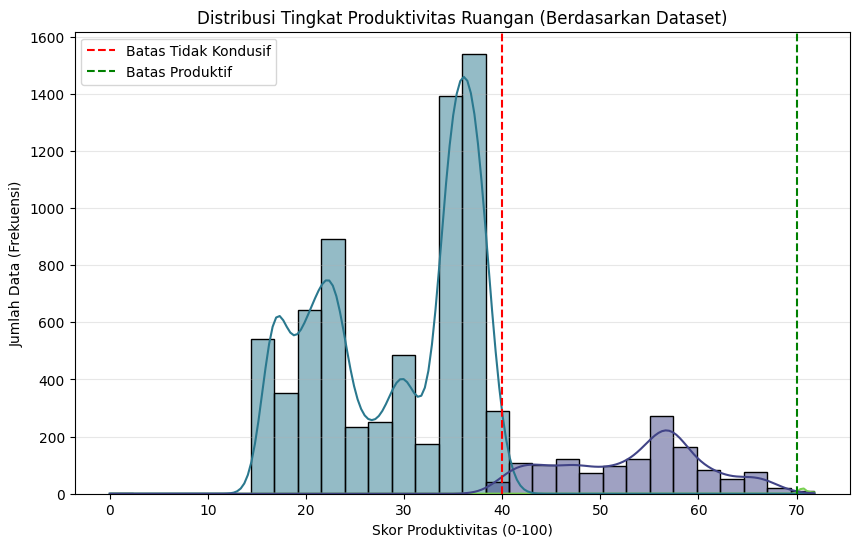


📊 Rangkuman Statistik:
Productivity_Status
Tidak Kondusif    6798
Cukup             1333
Produktif            9
Error/Unknown        3
Name: count, dtype: int64


In [ ]:
# ==========================================
# VISUALISASI HASIL AKHIR 📊
# ==========================================
import seaborn as sns

plt.figure(figsize=(10, 6))

# Histogram Skor
sns.histplot(data=df, x='Fuzzy_Score', hue='Productivity_Status', bins=30, kde=True, palette='viridis')

plt.title('Distribusi Tingkat Produktivitas Ruangan (Berdasarkan Dataset)')
plt.xlabel('Skor Produktivitas (0-100)')
plt.ylabel('Jumlah Data (Frekuensi)')
plt.axvline(x=40, color='r', linestyle='--', label='Batas Tidak Kondusif')
plt.axvline(x=70, color='g', linestyle='--', label='Batas Produktif')
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.show()

# Hitung Persentase
counts = df['Productivity_Status'].value_counts()
print("\n📊 Rangkuman Statistik:")
print(counts)